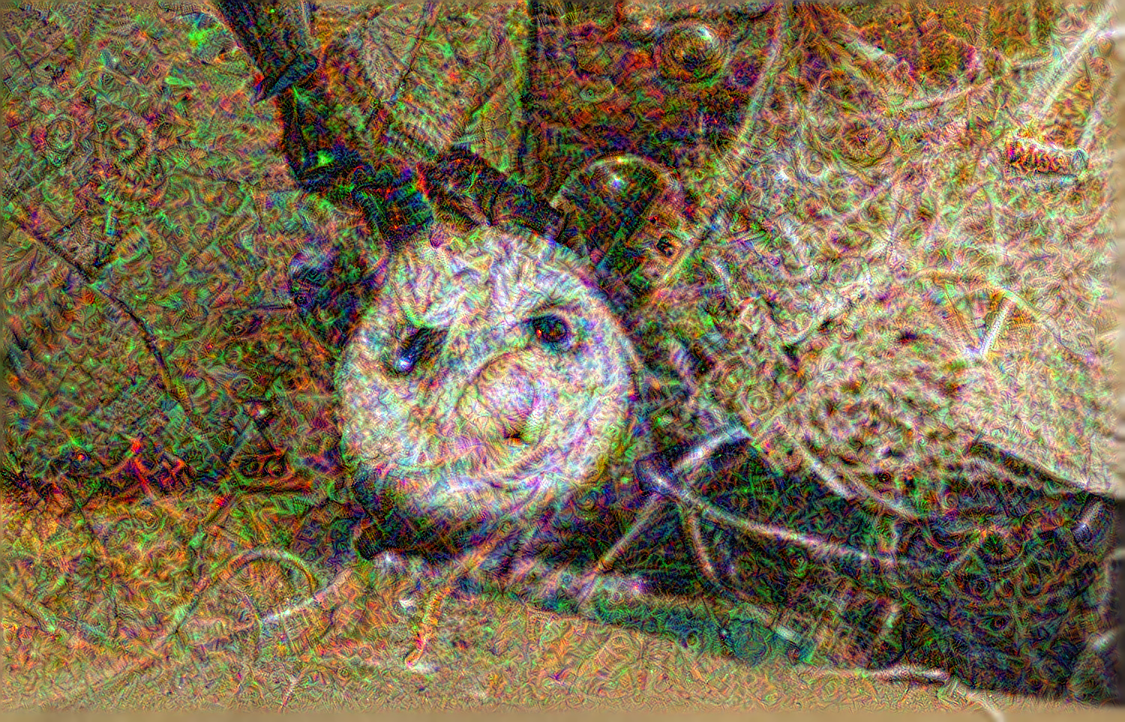

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import IPython.display as display
import PIL.Image
from tensorflow.keras.utils import plot_model
from deep_dream_model import DeepDream
STEPSIZE = 0.015
OCTAVE_SCALE = 1.5
STEPS = 100
MODEL_NBR = 10
def create_model_summary(model: DeepDream) -> None:
    """
    Args: Model
    
    Description: Function that creates the model as a file, should be imported to https://netron.app for visualization of the structure of the model
    
    Returns: None
    """
    model.save("../inception_v3_model.h5")

def main():
    original_img = PIL.Image.open("råtta.jpg")
    original_img.thumbnail((500, 500))
    original_img = np.array(original_img)
    display.display(PIL.Image.fromarray(np.array(original_img)))

    model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
    # create_model_summary(model)

    input_layers = model.input
    
    # Can change the layers to any layer, look at the model summary for a list of all available layers
    if MODEL_NBR == 0:
        dream_model_mixed0 = tf.keras.Model(inputs=input_layers, outputs=model.get_layer("mixed0").output) 
        deep_dream_mixed0 = DeepDream(model=dream_model_mixed0, stepsize=STEPSIZE, steps=STEPS)
        deep_dream_mixed0.perform_octave_scaling(octave_scale=OCTAVE_SCALE, img=original_img)
    
    elif MODEL_NBR == 5:
        dream_model_mixed5 = tf.keras.Model(inputs=input_layers, outputs=model.get_layer("mixed5").output)
        dream_model_mixed5 = DeepDream(model=dream_model_mixed5, stepsize=STEPSIZE, steps=STEPS)
        dream_model_mixed5.perform_octave_scaling(octave_scale=OCTAVE_SCALE, img=original_img)
    
    elif MODEL_NBR == 10:
        dream_model_mixed10 = tf.keras.Model(inputs=input_layers, outputs=model.get_layer('mixed10').output)
        deep_dream_mixed10 = DeepDream(model=dream_model_mixed10, stepsize=STEPSIZE, steps=STEPS)
        deep_dream_mixed10.perform_octave_scaling(octave_scale=OCTAVE_SCALE, img=original_img)
    
    else:
        print("No model provided")
    
main()